installation
http://mathalope.co.uk/2015/05/07/opencv-python-how-to-install-opencv-python-package-to-anaconda-windows/

- http://opencv.org/downloads.html



In [1]:
import cv2 # from conda install -c https://conda.binstar.org/menpo opencv

In [36]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)

3.1.0


In [3]:
cap = cv2.VideoCapture('robot.mp4')
print(cap.isOpened())

True


In [4]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (640, 360))
print(out.isOpened())
cap.release()
out.release()

True


# Images

In [5]:
image = cv2.imread("/Users/hs3m/Desktop/images/images3.jpg")
cv2.imwrite('i3.jpg', image)

True

In [8]:
gray_image = cv2.imread("/Users/hs3m/Desktop/images/images3.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite('i3_gray.jpg', gray_image)

True

In [14]:
print(image.shape)
print(gray_image.shape)

(177, 284, 3)
(177, 284)


In [19]:
print(image)

[[[ 38  19  11]
  [ 38  19  11]
  [ 30  11   3]
  ..., 
  [ 96  39  14]
  [ 96  39  14]
  [ 95  37  15]]

 [[ 38  20   9]
  [ 38  20   9]
  [ 36  18   7]
  ..., 
  [ 96  39  14]
  [ 95  38  13]
  [ 95  37  15]]

 [[ 39  19   8]
  [ 41  21  10]
  [ 47  27  16]
  ..., 
  [ 95  38  13]
  [ 95  38  13]
  [ 95  37  15]]

 ..., 
 [[143  89  42]
  [127  70  31]
  [119  59  30]
  ..., 
  [ 84  34   6]
  [ 84  34   6]
  [ 84  34   6]]

 [[119  63  16]
  [122  62  26]
  [118  54  29]
  ..., 
  [ 95  45  17]
  [ 96  46  18]
  [ 99  49  21]]

 [[ 93  53  25]
  [108  45  17]
  [117  45  15]
  ..., 
  [ 89  45  22]
  [ 97  51  27]
  [ 94  47  20]]]


In [22]:
print(image.item((0,0,0)))
image[0,0] = [255, 255, 255]

255


In [25]:
print(image)

[[[255 255 255]
  [ 38  19  11]
  [ 30  11   3]
  ..., 
  [ 96  39  14]
  [ 96  39  14]
  [ 95  37  15]]

 [[ 38  20   9]
  [ 38  20   9]
  [ 36  18   7]
  ..., 
  [ 96  39  14]
  [ 95  38  13]
  [ 95  37  15]]

 [[ 39  19   8]
  [ 41  21  10]
  [ 47  27  16]
  ..., 
  [ 95  38  13]
  [ 95  38  13]
  [ 95  37  15]]

 ..., 
 [[143  89  42]
  [127  70  31]
  [119  59  30]
  ..., 
  [ 84  34   6]
  [ 84  34   6]
  [ 84  34   6]]

 [[119  63  16]
  [122  62  26]
  [118  54  29]
  ..., 
  [ 95  45  17]
  [ 96  46  18]
  [ 99  49  21]]

 [[ 93  53  25]
  [108  45  17]
  [117  45  15]
  ..., 
  [ 89  45  22]
  [ 97  51  27]
  [ 94  47  20]]]


In [30]:
print(image.item(0,0,1))
image.itemset( (0, 0, 1), 128)
print(image.item(0,0,1))

255
128


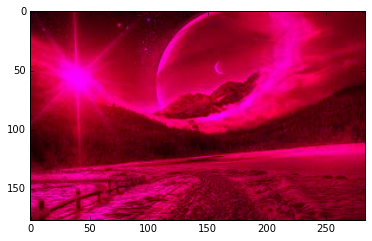

In [37]:
image[:, :, 1] = 0 # all green to 0
plt.imshow(image)


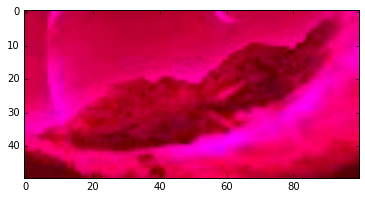

In [42]:
my_roi = image[50:100, 100:200]  # y, x
plt.imshow(my_roi)

In [43]:
print(my_roi.shape)
print(my_roi.size)
print(my_roi.dtype)

(50, 100, 3)
15000
uint8


# digit recognition
[tutorial](http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_ml/py_knn/py_knn_opencv/py_knn_opencv.html#knn-opencv)

In [88]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/Users/hs3m/Applications/OpenCV/samples/data/digits.png')
print("img shape {}".format(img.shape))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("gray shape {}".format(gray.shape))

# split to 5000 cells
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
print("length of cells {}".format(len(cells)))

# Make numpy array
x = np.array(cells)
print("x shape {}".format(x.shape))

# split data
train = x[:, :50].reshape(-1, 400).astype(np.float32)
test = x[:, 50:100].reshape(-1,400).astype(np.float32)

print("train shape {}".format(train.shape))
print("test shape {}".format(test.shape))

# create labels 
k = np.arange(10)
train_labels = np.repeat(k, 250)[:, np.newaxis]
test_labels = train_labels.copy()
print("train labels {}".format(train_labels[100:110]))
print("train_labels shape {}".format(train_labels.shape))
print("test_labels shape {}".format(test_labels.shape))

      
# kNN, train, test for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret, results, neighbours, dist = knn.findNearest(test, k=5)

# check accuracy
matches = results==test_labels
correct = np.count_nonzero(matches)
accuracy = correct * 100.0/result.size
print("accuracy: ",accuracy)

print ("results: ", results,"\n")
print ("neighbours: ", neighbours,"\n")
print ("distances: ", dist)

# plt.show()

img shape (1000, 2000, 3)
gray shape (1000, 2000)
length of cells 50
x shape (50, 100, 20, 20)
train shape (2500, 400)
test shape (2500, 400)
train labels [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
train_labels shape (2500, 1)
test_labels shape (2500, 1)
accuracy:  91.76
results:  [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 9.]
 [ 9.]
 [ 9.]] 

neighbours:  [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 ..., 
 [ 9.  9.  9.  9.  9.]
 [ 9.  9.  7.  9.  9.]
 [ 9.  9.  9.  4.  9.]] 

distances:  [[  361955.   598018.   606136.   608480.   610345.]
 [  790595.   959768.  1055851.  1065401.  1068785.]
 [  534520.   641045.   681043.   732508.   751514.]
 ..., 
 [  632329.   646093.   712409.   723294.   774745.]
 [  464467.   784272.   872704.   873413.   932973.]
 [ 1315263.  1358024.  1463505.  1521671.  1720079.]]


In [69]:
# save the data
np.savez('knn_data.npz', train=train, train_labels=train_labels)

In [72]:
# laod the data
with np.load('knn_data.npz') as data:
    print(data.files)
    train = data['train']
    train_labels = data['train_labels']

['train_labels', 'train']
